# Task 2 (Supervised Learning - Linear Regression)


In this Task, we have to Predict the percentage of Scores that a student can achieve after studying for a certain hours. This Task is performed on Simple Linear Regression, where we have Two variables(Score, Hours). And In the end, we have to predict the scores if a student studies for 9.25 hours

# Importing Libraries

We will import all the libraby that are needed till Data Visualization

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ppy
%matplotlib inline
import seaborn as ses

We used the %matplotlib inline to show the user only the relivent part of the graph

# Loading the Data

Loading the Dataset into Jupyter Notebook via the link provided to us into the CSV format(i.e., Comma Seperated Value file)

In [48]:
url = 'http://bit.ly/w-data'

# Loading data into CSV fomrat
student = pd.read_csv('Student_marks_per_hour.csv')
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

Here we will explore the data set. Exploring the data set will be consisting of Checking the size of file, Head, Tail and other details

In [47]:
print("The Shape of Table is in (ROW,COLUMNS) format",student.shape)
print("-----------------------------------------\n")
print(student.head())
print("-----------------------------------------")
print(student.tail())

The Shape of Table is in (ROW,COLUMNS) format (25, 2)
-----------------------------------------

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
-----------------------------------------
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Checking for Null Values

Checking for NULL Values is important as the null values can change the prediction very significantly

In [49]:
print(student.isnull().sum())

Hours     0
Scores    0
dtype: int64


As displayed, there is no NULL value in the Dataset. So, now we can move ahead

# Plotting of Data 
We Plot the Data to see the relation between different Data variable 


<function matplotlib.pyplot.show(*args, **kw)>

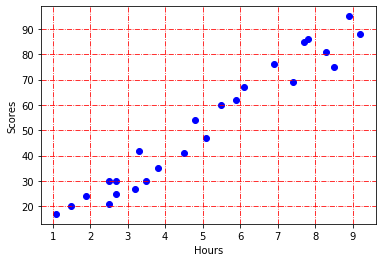

In [53]:
ppy.scatter(student['Hours'],student['Scores'],color = 'blue')
ppy.grid(color = 'red', linestyle = '-.')
ppy.xlabel('Hours')
ppy.ylabel('Scores')
ppy.show

# HeatMap Plot of the Data
After Seeing the Linear Relation between data-variables, we have to check the correlation between these variables

In [4]:
# Checking the Co-relation between the attribute
Corel = student.corr()
Corel

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


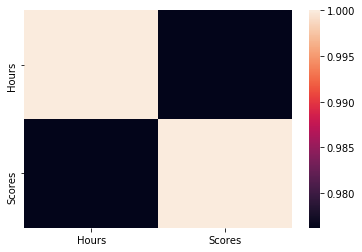

In [52]:
# Plotting the Heatmap
ses.heatmap(Corel)


# Splitting the Data
We will be Splitting our ready-handed data into Train Data and Test Data for checking of the prediction that are made by the algorithm. We will be using train_test_split() function to split the Data

In [6]:
# Spliting the Dataset for training the model
from sklearn.model_selection import train_test_split

X = student.loc[:,'Hours'].values
X = X.reshape(-1,1)

Y = student.loc[:,'Scores'].values
Y = Y.reshape(-1,1)

Train_X,Test_X,Train_Y,Test_Y = train_test_split(X,Y,test_size = 0.1)

# Training of the Linear Model
Here our Train splitted data will help the Linear model to train which will help us to predict well

In [7]:
# Importing the Model and Training it as well
from sklearn.linear_model import LinearRegression

marks = LinearRegression()

marks.fit(Train_X,Train_Y)

print('The model training is COMPLETED')

The model training is COMPLETED


In [8]:
# Coeffiecients
print('Coeffiecients:',marks.coef_)

# Intercept
print('Intercept: ',marks.intercept_)

Coeffiecients: [[9.68645092]]
Intercept:  [2.71820867]


# Plotting the Linearn Regression Line
Linearn Regression helps us to given a best fitting line to our data on the basis of which we do our predictions.
Using malplotlib's plot() function to make a Line graph in our pre-existing Plot above, we see how well the Prediction may be.

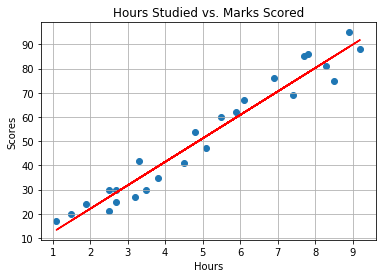

In [9]:
# Plotting for the test data
ppy.scatter(X, Y)
# Here mx+c = reg.coef_*X+reg.intercept
ppy.plot(X, marks.coef_*X+marks.intercept_,color='r')
ppy.xlabel('Hours')
ppy.ylabel('Scores')
ppy.title('Hours Studied vs. Marks Scored')
ppy.grid(True)
ppy.show()

# Testing the MODEL
After all the fitting is done, It's time for the testing of Model to check how well it gives the predictions./

In [10]:
# Printing the x_test values
print('Test_X')
print(Test_X)
print("-----------------------------------------")
# Printing the predicted y_pred
Pred_Y = marks.predict(Test_X)
print('Test_Y')
for i in Test_Y:
    print(i)
print("-----------------------------------------")
print('Pred_Y')
for i in Pred_Y:
    print(i)


Test_X
[[6.9]
 [5.5]
 [5.1]]
-----------------------------------------
Test_Y
[76]
[60]
[47]
-----------------------------------------
Pred_Y
[69.55472002]
[55.99368873]
[52.11910837]


# Accuracy of our model

Here we will check the accuracy of our linear model by using score() function as follows

In [11]:
marks.score(Test_X,Test_Y)

0.8014278805108326

# Mean squared error

Here we will find the mean squared error of our model by using mean_absolute_error(). We calculate Mean_Absolute_Error by Subtracting The Actual value by the Predicted one and then sqaure the result for keeping negative values, psoitive one


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Test_Y, Pred_Y))

Mean Absolute Error: 5.190233203527143


# Predicting the score of student studying for 9.25 hours.

In [41]:
hour_input = {'Prediction':'9.25'}
hours = pd.DataFrame([hour_input])

# Predicting the marks scored using the linear model.
score = hours.iloc[:,0].values
score = score.reshape(-1,1)

prediction = marks.predict(score)


print('The student studying for',hours['Prediction'].values,'hours will score',prediction)



The student studying for ['9.25'] hours will score [[92.31787968]]
